In [1]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

## Painel Estatístico em Big Data

### Recapitulação:

In [4]:
inicial = (
    pl.scan_parquet("C:/Users/leonardo.ferraz/Documents/Leonardo Ferraz/BigDataSenac/projetofinal/parquets/title.basics_POLARS.parquet")
)

display(inicial.collect())

tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
str,str,str,str,i64,i64,str,i64,str
"""tt0000001""","""short""","""Carmencita""","""Carmencita""",0,1894,null,1,"""Documentary,Short"""
"""tt0000002""","""short""","""Le clown et ses chiens""","""Le clown et ses chiens""",0,1892,null,5,"""Animation,Short"""
"""tt0000003""","""short""","""Poor Pierrot""","""Pauvre Pierrot""",0,1892,null,5,"""Animation,Comedy,Romance"""
"""tt0000004""","""short""","""Un bon bock""","""Un bon bock""",0,1892,null,12,"""Animation,Short"""
"""tt0000005""","""short""","""Blacksmith Scene""","""Blacksmith Scene""",0,1893,null,1,"""Short"""
…,…,…,…,…,…,…,…,…
"""tt9916848""","""tvEpisode""","""Episode #3.17""","""Episode #3.17""",0,2009,null,null,"""Drama"""
"""tt9916850""","""tvEpisode""","""Episode #3.19""","""Episode #3.19""",0,2010,null,null,"""Drama"""
"""tt9916852""","""tvEpisode""","""Episode #3.20""","""Episode #3.20""",0,2010,null,null,"""Drama"""


### Métricas: Média, Mediana, Moda, Variância, Desvio Padrão, Amplitude

In [4]:
# Construindo a expressão de cálculo
metricas1 = inicial.select([
    pl.col("VALOR PARCELA").mean().alias("Média"),
    pl.col("VALOR PARCELA").median().alias("Mediana"),
    # Moda retorna uma lista, pegamos o primeiro valor
    pl.col("VALOR PARCELA").mode().first().alias("Moda"),
    pl.col("VALOR PARCELA").var().alias("Variância"),
    pl.col("VALOR PARCELA").std().alias("Desvio_Padrão"),
    (pl.col("VALOR PARCELA").max() - pl.col("VALOR PARCELA").min()).alias("Amplitude_Total")
]).collect()

print("\n--- Estatísticas Descritivas (Valor do Benefício) ---")
display(metricas1)


--- Estatísticas Descritivas (Valor do Benefício) ---


Média,Mediana,Moda,Variância,Desvio_Padrão,Amplitude_Total
f64,f64,f64,f64,f64,f64
670.023784,650.0,600.0,36439.097638,190.890276,3913.0


### Forma e Posição: Assimetria, Curtose e Quartis

In [5]:
metricas2 = inicial.select([
    pl.col("VALOR PARCELA").quantile(0.25).alias("Q1"),
    pl.col("VALOR PARCELA").quantile(0.50).alias("Q2"),
    pl.col("VALOR PARCELA").quantile(0.75).alias("Q3"),
    pl.col("VALOR PARCELA").skew().alias("Assimetria"),
    pl.col("VALOR PARCELA").kurtosis().alias("Curtose")
]).collect()

print("\n--- Quartis e Forma da Distribuição ---")
display(metricas2)

# Análise rápida da Assimetria
assimetria = metricas2["Assimetria"][0]
print(f"\nInterpretação da Assimetria ({assimetria:.2f}):")
if -0.5 <= assimetria <= 0.5:
    print("-> Distribuição Simétrica (Dados bem balanceados)")
elif assimetria > 0.5:
    print("-> Assimétrica Positiva (Cauda para a direita - Existem valores muito altos puxando a média)")
else:
    print("-> Assimétrica Negativa (Cauda para a esquerda)")


--- Quartis e Forma da Distribuição ---


Q1,Q2,Q3,Assimetria,Curtose
f64,f64,f64,f64,f64
600.0,650.0,750.0,0.926063,4.72103



Interpretação da Assimetria (0.93):
-> Assimétrica Positiva (Cauda para a direita - Existem valores muito altos puxando a média)


### Outliers

In [6]:
# 1. Recuperar os valores de Q1 e Q3 calculados acima
Q1 = metricas2["Q1"][0]
Q3 = metricas2["Q3"][0]
IQR = Q3 - Q1

# 2. Definir limites
limite_inferior = Q1 - (1.5 * IQR)
limite_superior = Q3 + (1.5 * IQR)

print(f"\nLimites para Outliers: Inferior ({limite_inferior}) | Superior ({limite_superior})")

# 3. Filtrar e contar os Outliers usando Polars
outliers = inicial.filter(
    (pl.col("VALOR PARCELA") < limite_inferior) |
    (pl.col("VALOR PARCELA") > limite_superior)
).select(["NOME_MUNICIPIO", "NIS FAVORECIDO", "VALOR PARCELA"]).collect()

print(f"Quantidade de pagamentos considerados Outliers: {outliers.height}")
print("Exemplos de valores discrepantes:")
display(outliers.head())


Limites para Outliers: Inferior (375.0) | Superior (975.0)
Quantidade de pagamentos considerados Outliers: 2648673
Exemplos de valores discrepantes:


NOME_MUNICIPIO,NIS FAVORECIDO,VALOR PARCELA
str,i64,f64
"""PIRASSUNUNGA""",16017425650,1010.0
"""PIRASSUNUNGA""",16017425650,1010.0
"""PIRASSUNUNGA""",16017425650,1010.0
"""ITANHAEM""",16451295915,1102.0
"""PIRASSUNUNGA""",16017425650,1010.0


### Visualização

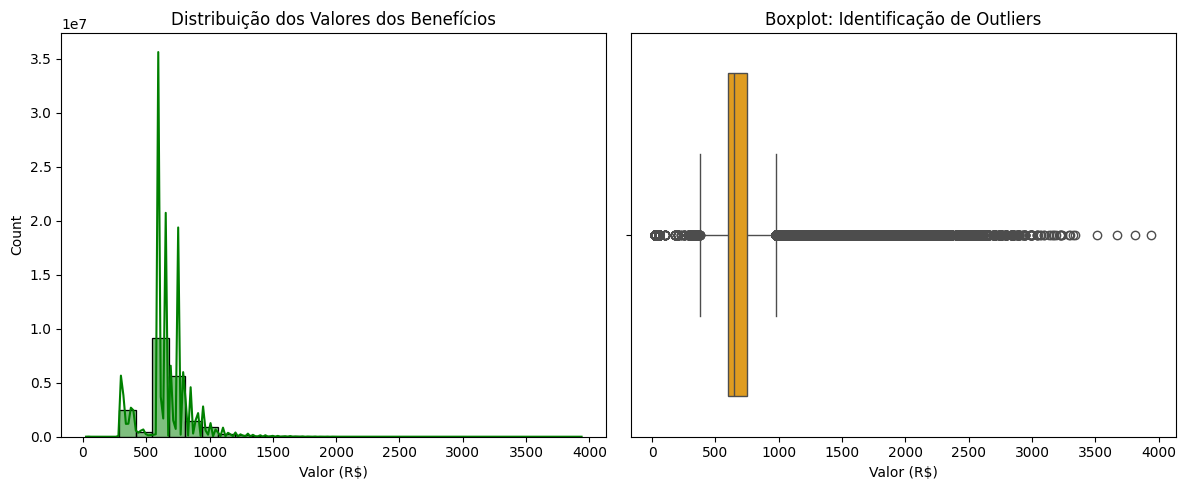

In [7]:
# Coletando a coluna para plotagem
visual = inicial.select("VALOR PARCELA").collect().to_series()

plt.figure(figsize=(12, 5))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(visual, bins=30, kde=True, color='green')
plt.title('Distribuição dos Valores dos Benefícios')
plt.xlabel('Valor (R$)')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=visual, color='orange')
plt.title('Boxplot: Identificação de Outliers')
plt.xlabel('Valor (R$)')

plt.tight_layout()
plt.show()

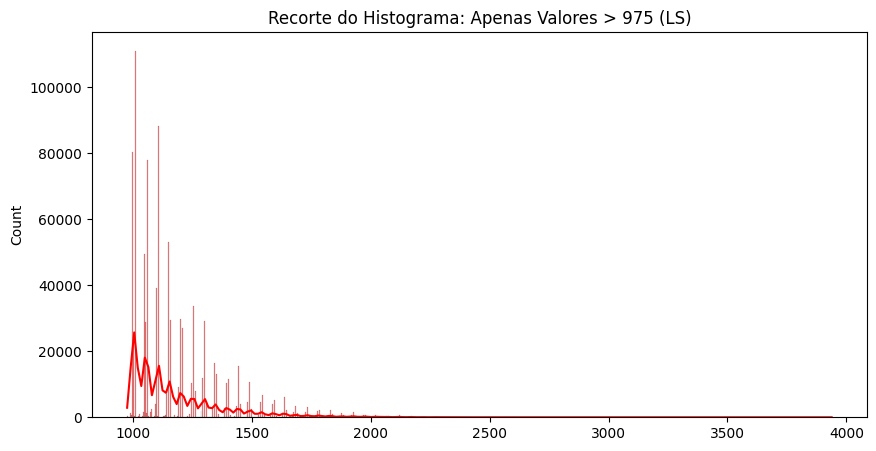

In [8]:

visual_superiores = inicial.filter(pl.col("VALOR PARCELA") > 975).select("VALOR PARCELA").collect().to_series()

plt.figure(figsize=(10, 5))
sns.histplot(visual_superiores, kde=True, color='red')
plt.title('Recorte do Histograma: Apenas Valores > 975 (LS)')
plt.show()

## Correlação de Pearson

O dataset original de exemplo aqui tem apenas uma coluna numérica principal (VALOR PARCELA). Para calcular **correlação**, precisamos de **duas variáveis numéricas comparáveis**.

Então, mudamos a perspectiva (granularidade). Ao invés de olhar para o beneficiário individual, vamos olhar para os municípios. Criaremos um novo DataFrame agrupado por cidade contendo:

- Total de Beneficiários (Contagem)

- Valor Médio do Benefício na cidade (Média)

**Pergunta de Negócio:** *Cidades com mais beneficiários tendem a ter um valor médio de benefício maior, menor ou igual às cidades pequenas?*

In [9]:
# 1. Criar o DataFrame Agregado por Município
df_municipios = inicial.group_by("NOME_MUNICIPIO").agg([
    pl.len().alias("Qtd_Beneficiarios"),          # Variável X
    pl.col("VALOR PARCELA").mean().alias("Valor_Medio_Pago") # Variável Y
])

# 2. Calcular a Correlação de Pearson
correlacao = df_municipios.select(
    pl.corr("Qtd_Beneficiarios", "Valor_Medio_Pago", method="pearson").alias("r")
).collect()

r = correlacao["r"][0]
r2 = r**2

print(f"\n--- Análise de Correlação por Município ---")
print(f"Coeficiente de Pearson (r): {r:.4f}")
print(f"Coeficiente de Determinação (r²): {r2:.4f}")

# Interpretação
if abs(r) < 0.3:
    print("Conclusão: Correlação FRACA. O tamanho da cidade não influencia o valor médio pago individualmente.")
elif abs(r) > 0.7:
    print("Conclusão: Correlação FORTE.")
else:
    print("Conclusão: Correlação MODERADA.")


--- Análise de Correlação por Município ---
Coeficiente de Pearson (r): 0.0219
Coeficiente de Determinação (r²): 0.0005
Conclusão: Correlação FRACA. O tamanho da cidade não influencia o valor médio pago individualmente.


## Gráfico de Dispersão


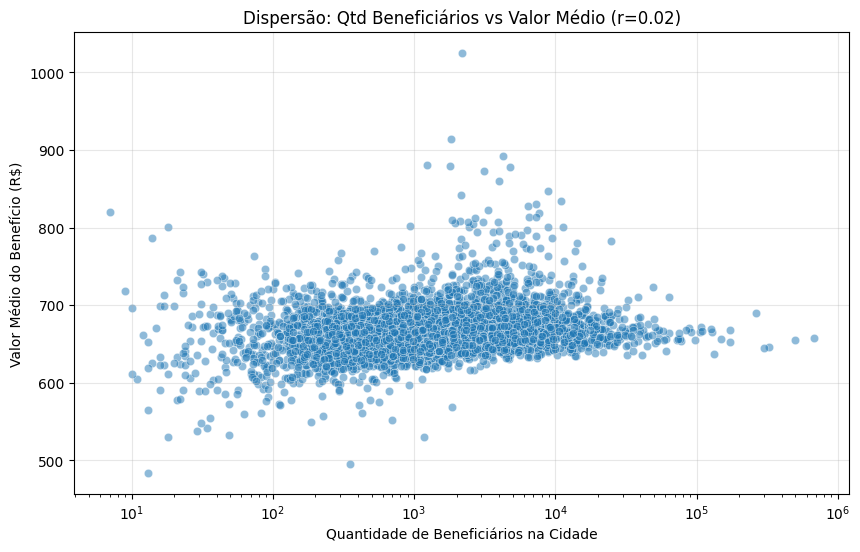

In [10]:
# Coletando os dados agregados para o gráfico
df_scatter = df_municipios.collect()

plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df_scatter.to_pandas(),
    x="Qtd_Beneficiarios",
    y="Valor_Medio_Pago",
    alpha=0.5
)

plt.title(f'Dispersão: Qtd Beneficiários vs Valor Médio (r={r:.2f})')
plt.xlabel('Quantidade de Beneficiários na Cidade')
plt.ylabel('Valor Médio do Benefício (R$)')
plt.grid(True, alpha=0.3)
plt.xscale('log') # Escala logarítmica ajuda a visualizar melhor quando há cidades gigantes (capitais) e minúsculas
plt.show()

Observe no gráfico de dispersão:

- Se os pontos estiverem espalhados como uma "nuvem" sem forma, confirmamos que não há relação linear;
- Se formarem uma linha ou curva, temos uma tendência.


### Comportamentos na Correlação

#### Classificação por Direção

[Independentemente do método matemático](https://datascientest.com/en/pearson-and-spearman-correlations-a-guide-to-understanding-and-applying-correlation-methods) (Pearson - o que utilizamos - ou Spearman), a correlação sempre contará uma história sobre como duas variáveis se movem juntas:

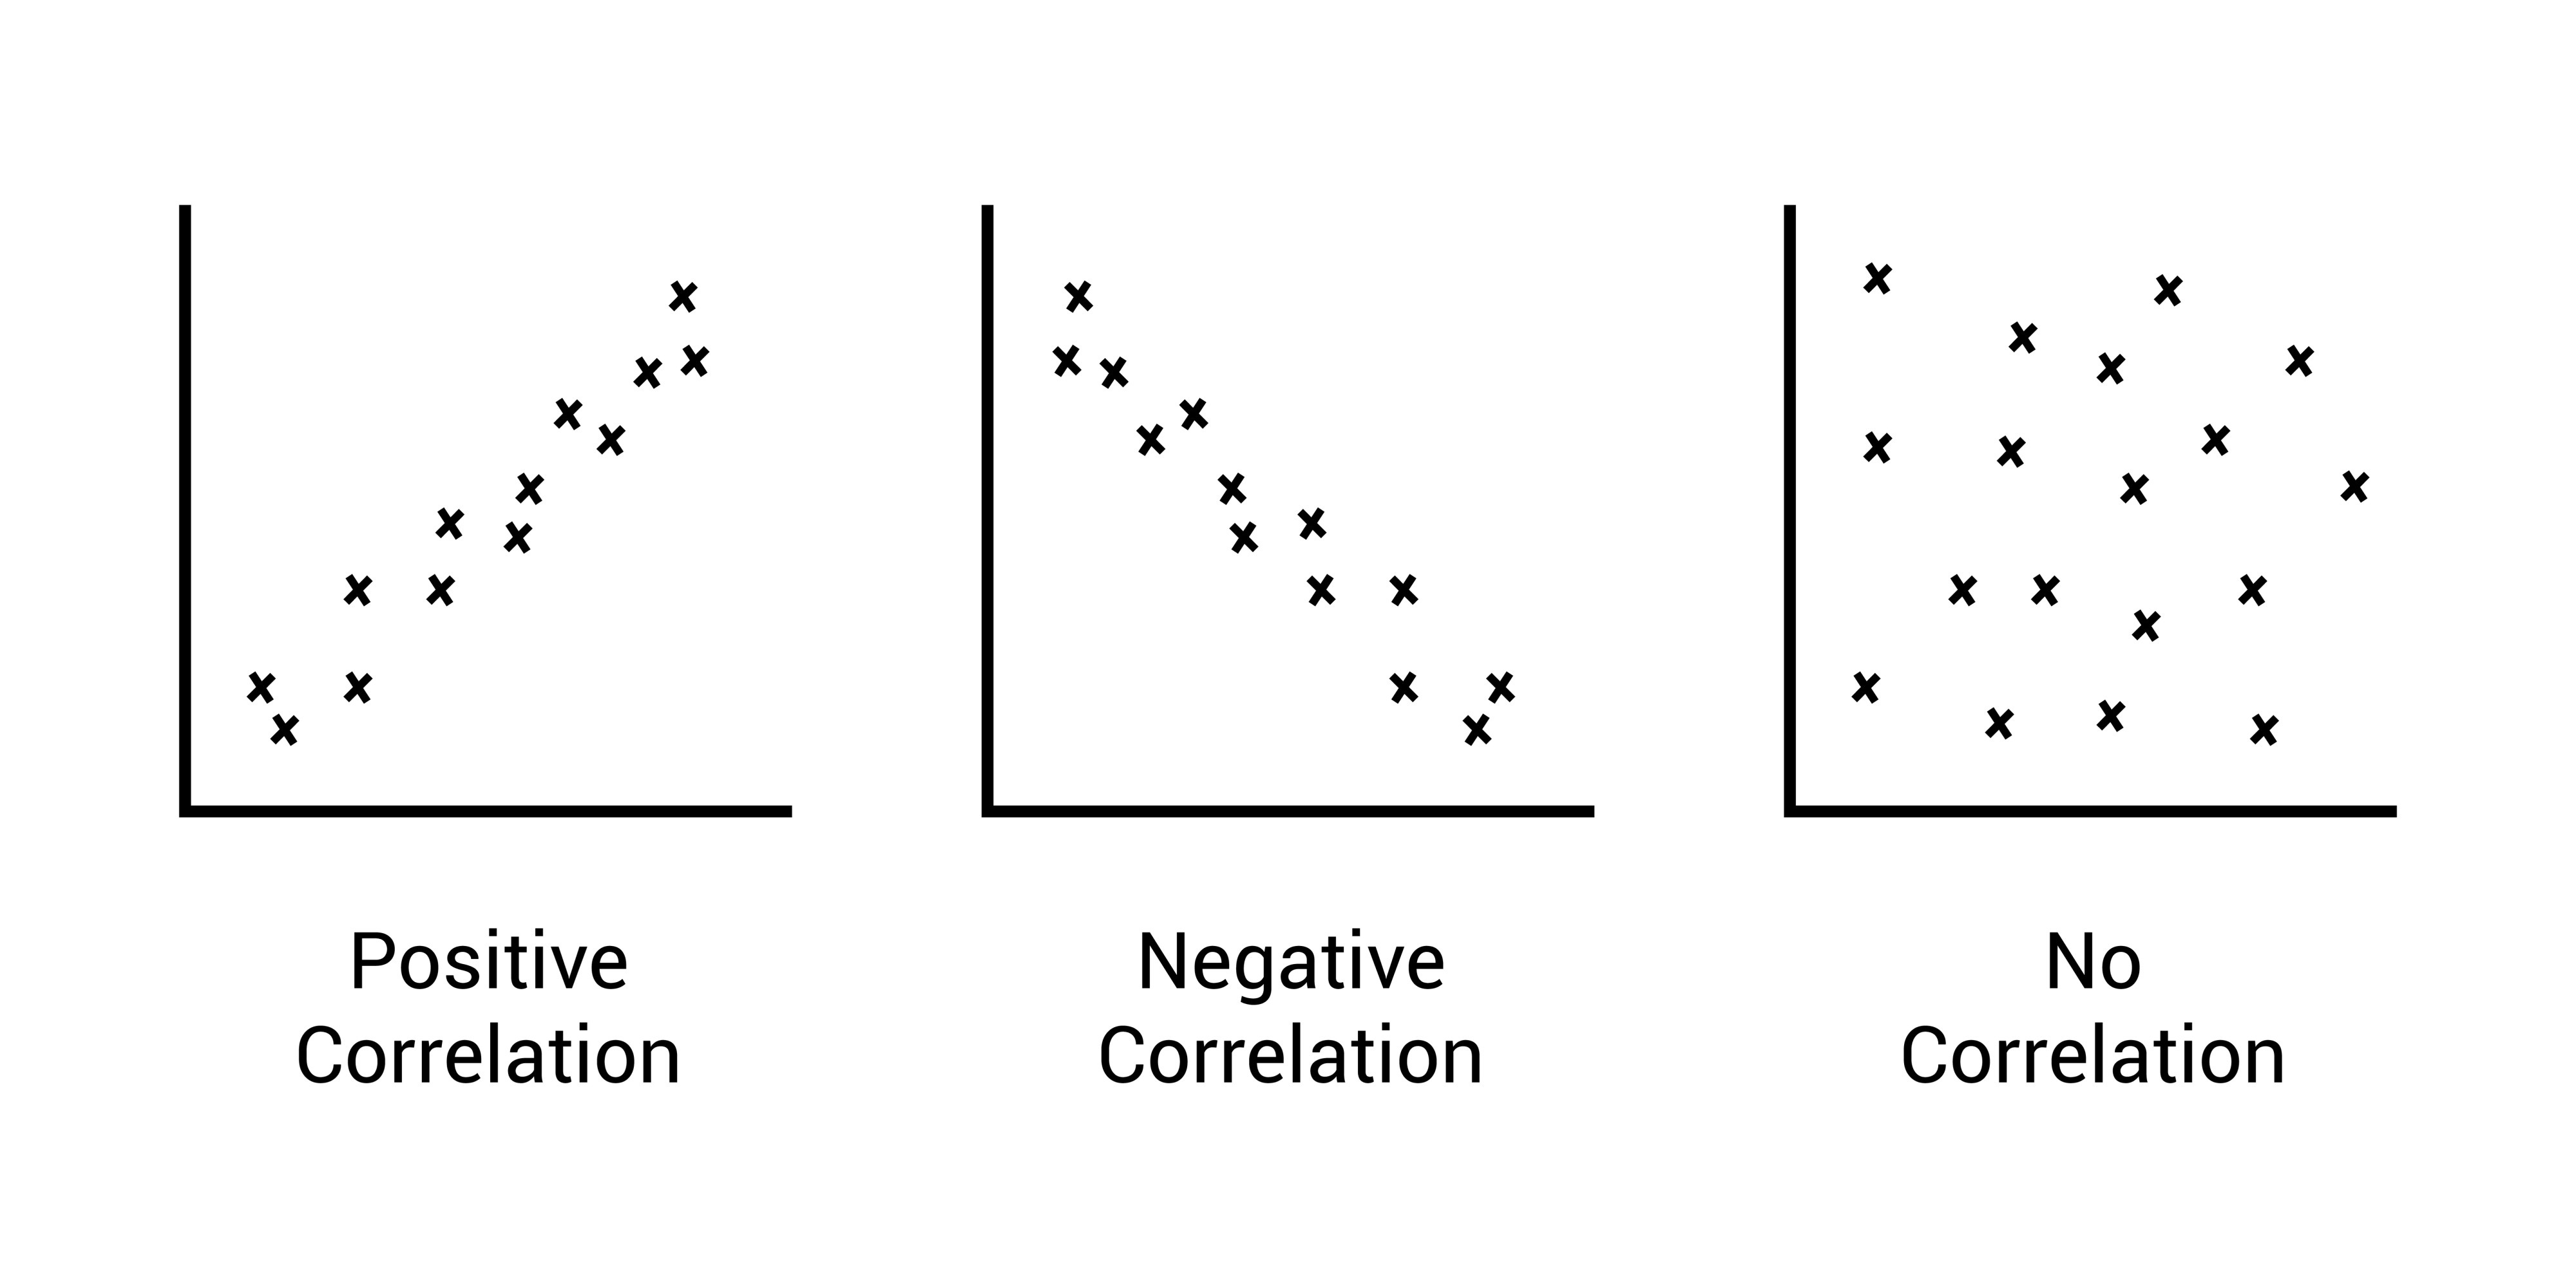


- Correlação Positiva ($r > 0$):

Quando uma variável aumenta, a outra também tende a aumentar. Exemplo no nosso contexto: Quantidade de membros na família vs. Valor total recebido. (Geralmente, mais filhos = benefício maior). Visual: Uma linha subindo da esquerda para a direita.

- Correlação Negativa ($r < 0$):

Quando uma variável aumenta, a outra tende a diminuir (relação inversa). Exemplo: Renda per capita da família vs. Valor do benefício. (Quanto maior a renda declarada, menor tende a ser o complemento do governo, até zerar). Visual: Uma linha descendo da esquerda para a direita.

- Correlação Nula ou Neutra ($r \approx 0$):

Não há padrão. O aumento de uma variável não afeta a outra. Exemplo: Número do NIS (final) vs. Valor do benefício. (O número do cartão é aleatório/sequencial e não define quanto a pessoa recebe). Visual: Uma nuvem de pontos espalhada sem forma.

#### Classificação por Método

Polars suporta principalmente Pearson e Spearman.
 
 A. Correlação de Pearson ($r$):
 
 - O que mede: Relações Lineares.
 - Assume que os dados seguem uma distribuição normal e formam uma linha reta.
 - É muito sensível a outliers. Um único valor gigante (como aquele pagamento de R$ 9.000 que vimos antes) pode distorcer o cálculo e dizer que existe uma correlação onde não existe, ou vice-versa.
 - Comando Polars: pl.corr(a, b, method='pearson')
 
 B. Correlação de Spearman ($\rho$):
 
 - O que mede: Relações Monotônicas. Ele não se importa com os valores brutos, mas sim com o Ranking (a ordem) deles. 
 - Monotônica: "Sempre que X sobe, Y sobe", mesmo que não seja em uma linha reta perfeita (pode ser uma curva).
 - É robusta a outliers. Se alguém recebeu R$ 1.000.000,00, o método Spearman vai tratar esse valor apenas como "o 1º maior valor", ignorando a magnitude exagerada do número.
 - Comando Polars: pl.corr(a, b, method='spearman')

 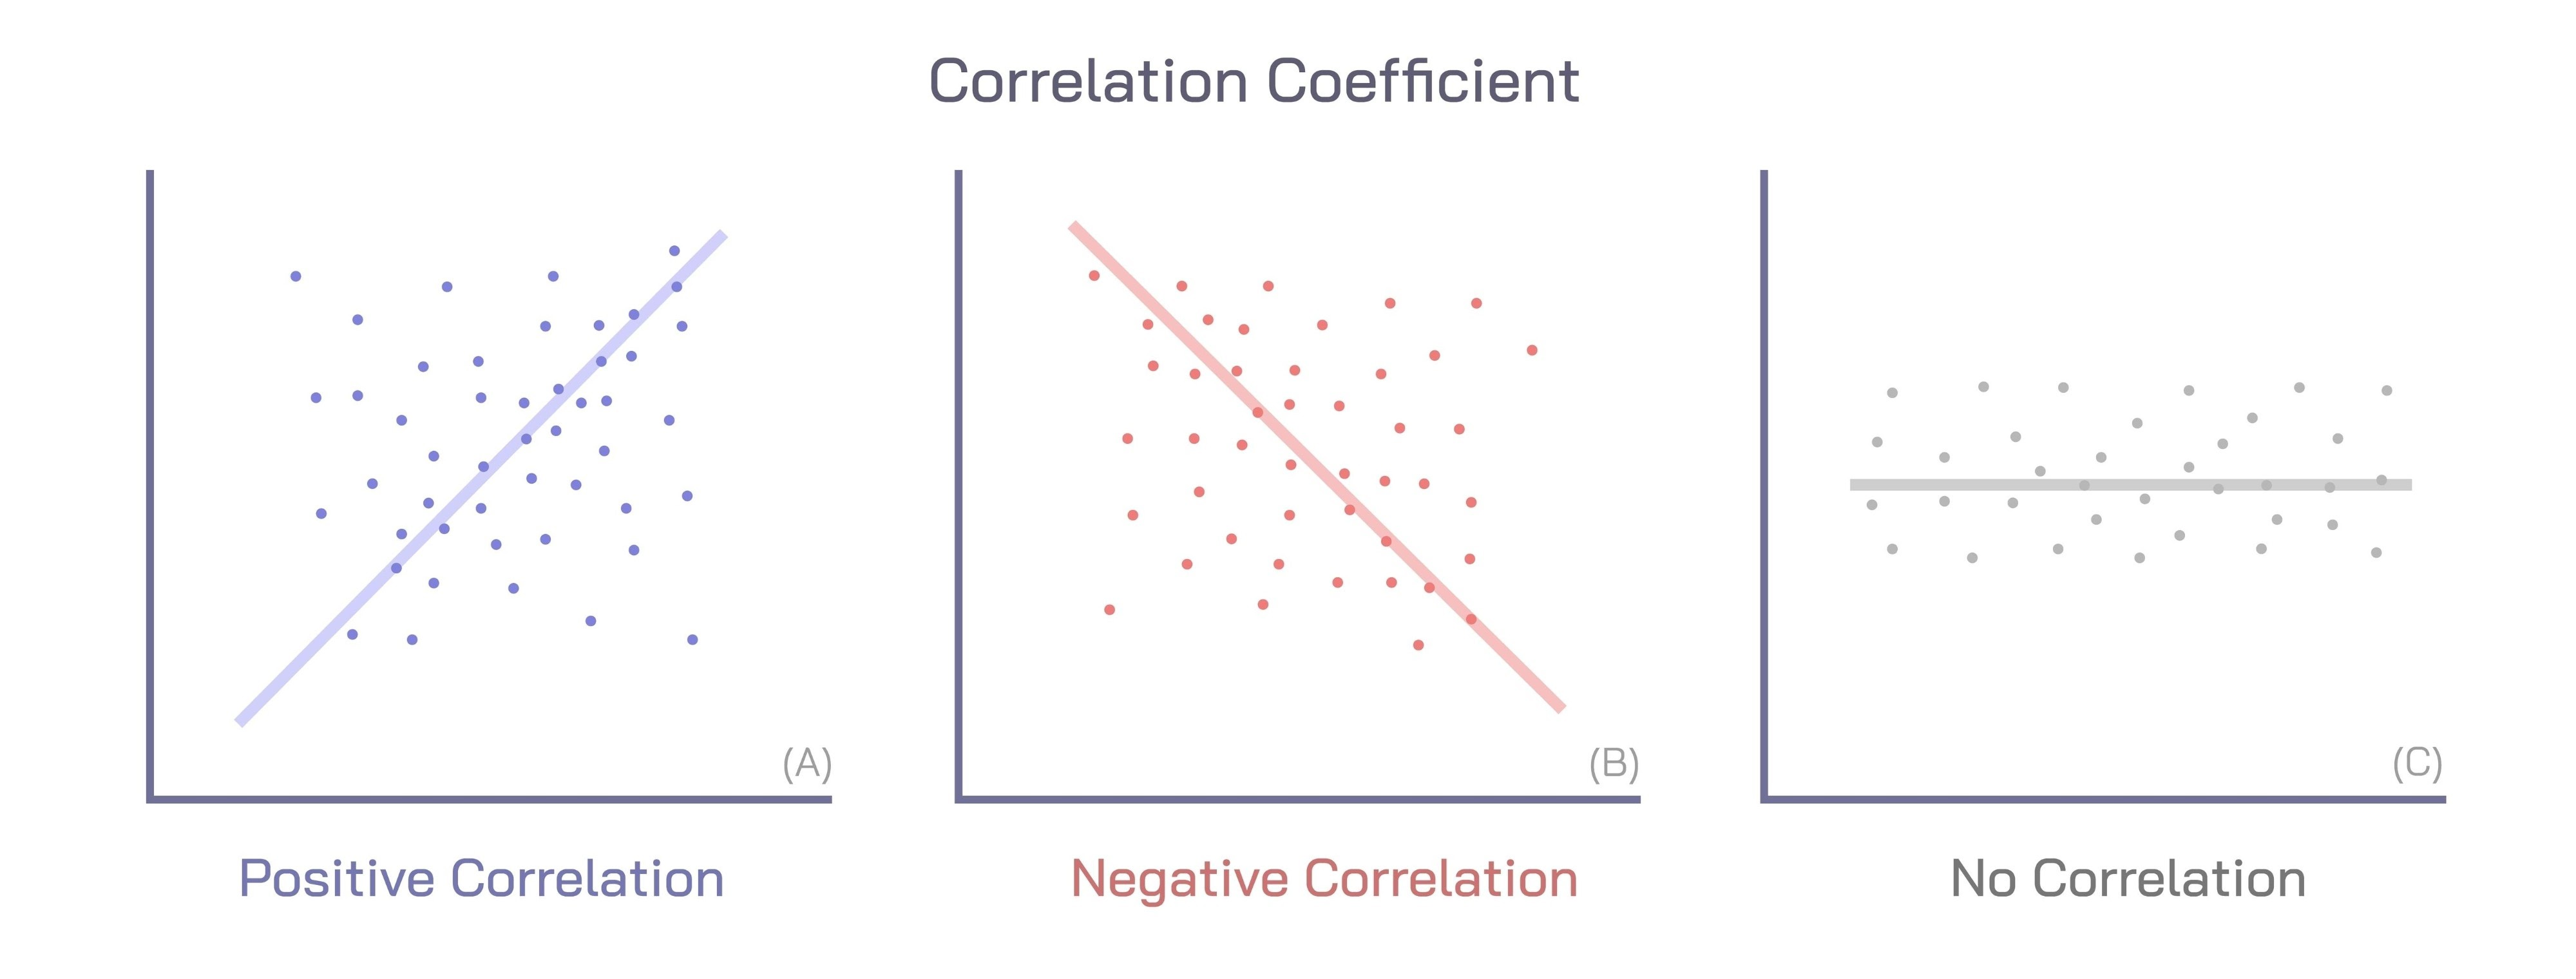

In [11]:
# Exemplo aplicando no seu LazyFrame agregado por município
analise_correlacao = df_municipios.select([
    pl.corr("Qtd_Beneficiarios", "Valor_Medio_Pago", method="pearson").alias("Pearson"),
    pl.corr("Qtd_Beneficiarios", "Valor_Medio_Pago", method="spearman").alias("Spearman")
]).collect()

print(analise_correlacao)

shape: (1, 2)
┌──────────┬──────────┐
│ Pearson  ┆ Spearman │
│ ---      ┆ ---      │
│ f64      ┆ f64      │
╞══════════╪══════════╡
│ 0.021899 ┆ 0.214302 │
└──────────┴──────────┘


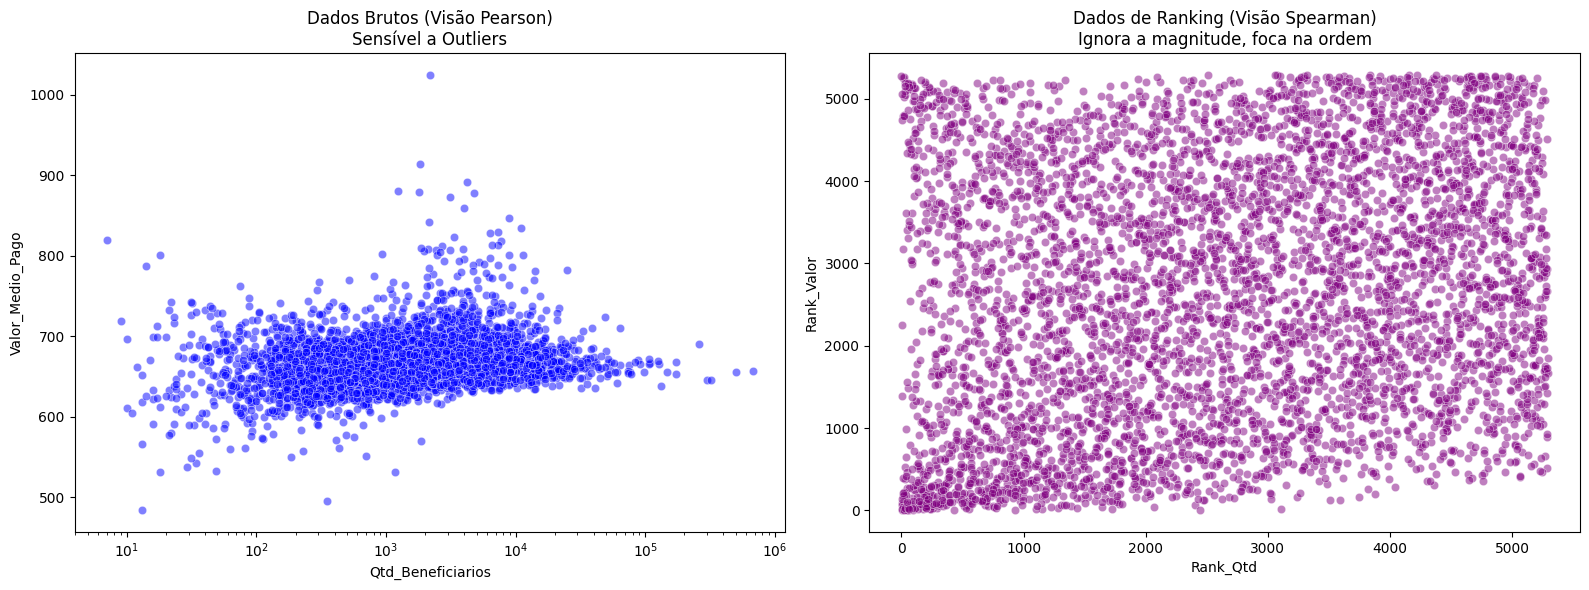

In [12]:
# 1. Preparar os dados: Criar colunas de Ranking
# O método .rank() troca o valor absoluto pela posição dele na fila (primeiro, segundo, terceiro...)
df_spearman = df_municipios.with_columns([
    pl.col("Qtd_Beneficiarios").rank().alias("Rank_Qtd"),
    pl.col("Valor_Medio_Pago").rank().alias("Rank_Valor")
]).collect() # Coletamos para o pandas conseguir ler

# 2. Plotar Comparativo: Dados Brutos (Pearson) vs. Ranks (Spearman)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico A: Dados Brutos (O que o Pearson enxerga)
sns.scatterplot(
    data=df_spearman.to_pandas(),
    x="Qtd_Beneficiarios",
    y="Valor_Medio_Pago",
    ax=axes[0],
    alpha=0.5,
    color='blue'
)
axes[0].set_title('Dados Brutos (Visão Pearson)\nSensível a Outliers')
axes[0].set_xscale('log')

# Gráfico B: Ranks (O que o Spearman enxerga)
sns.scatterplot(
    data=df_spearman.to_pandas(),
    x="Rank_Qtd",
    y="Rank_Valor",
    ax=axes[1],
    alpha=0.5,
    color='purple'
)
axes[1].set_title('Dados de Ranking (Visão Spearman)\nIgnora a magnitude, foca na ordem')

plt.tight_layout()
plt.show()